**SYNTHETIC GENERATION FOR MACHINE LEARNING**

**PREPROCESSOR**

**IMPORT PYTHON LIBRARIES**

In [ ]:
import os
import random 
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [ ]:
import zipfile
from zipfile import ZipFile

**INITIALISE VARIABLES**

In [ ]:
img_width = 224
img_height = 224
img_size = (img_width, img_height)

# upload the zip file dataset from local desktop and unzipping the file
local_zip = '/Lego Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
Lego_dataset = local_zip
test_dir = '/tmp/Lego Dataset/test ds/'
train_dir = '/tmp/Lego Dataset/train ds/'

**HELPER FUNCTIONS**

In [ ]:
def load_center_crop_resize(img_path):
  # load the image
  img_bgr = cv2.imread(img_path)
  #convert to rgb
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

  #convert to grayscale
  img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
  #normalize the image
  img_gray_norm = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX)
  #add back the color channel to the gray image
  #so the shape remains the same
  img_gray = cv2.cvtColor(img_gray_norm, cv2.COLOR_GRAY2RGB)

  # edge detection
  img_gray_blur = cv2.GaussianBlur(img_gray_norm, (3,3), 0)
  sobel_64 = cv2.Sobel(src=img_gray_norm, ddepth= cv2.CV_64F, dx=1, dy=1, ksize=5)
  abs_64 = np.absolute(sobel_64)
  edges = np.uint8(abs_64)
  img_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

  #convert to hsv
  img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

  #convert to yuv
  img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)

  # get image size
  height, width, colours = img_rgb.shape

  # calculate margins
  top = 0
  left = 0
  if height > width:
    top = int((height - width) / 2);
  else:
    left = int((width - height) / 2);

    #crop
    img_rgb_crop = img_rgb[top:height-top, left:width-left]
    img_gray_crop = img_gray[top:height-top, left:width-left]
    img_hsv_crop = img_hsv[top:height-top, left:width-left]
    img_yuv_crop = img_yuv[top:height-top, left:width-left]
    img_edges_crop = img_edges[top:height-top, left:width-left]

    #resize
    img_rgb_resize = cv2.resize(img_rgb_crop, (img_width, img_height))
    img_gray_resize = cv2.resize(img_gray_crop, (img_width, img_height))
    img_hsv_resize = cv2.resize(img_hsv_crop, (img_width, img_height))
    img_yuv_resize = cv2.resize(img_yuv_crop, (img_width, img_height))
    img_edges_resize = cv2.resize(img_edges_crop, (img_width, img_height))

    return img_rgb, img_rgb_resize, img_gray_resize, img_hsv_resize, img_yuv_resize, img_edges_resize


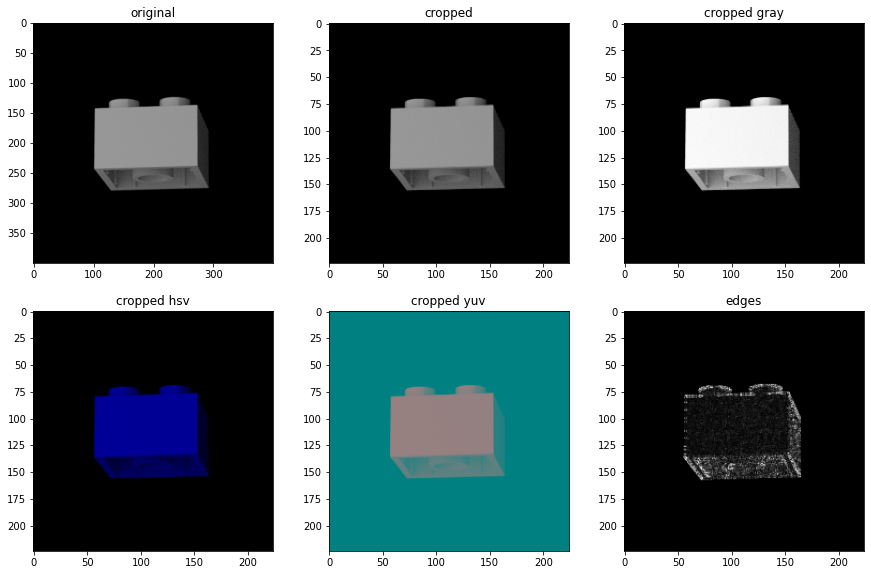

In [ ]:
original, cropped_rgb, cropped_gray, cropped_hsv, cropped_yuv, edges = load_center_crop_resize(f"{train_dir}Brick/Brick 2x2/3003 brick 2x2 001R.png")

plt.figure(figsize=(15, 15))
ax = plt.subplot(3, 3, 1)
plt.title('original')
plt.imshow(original)
ax = plt.subplot(3, 3, 2)
plt.title('cropped')
plt.imshow(cropped_rgb)
ax = plt.subplot(3, 3, 3)
plt.title('cropped gray')
plt.imshow(cropped_gray)
ax = plt.subplot(3, 3, 4)
plt.title('cropped hsv')
plt.imshow(cropped_hsv)
ax = plt.subplot(3, 3, 5)
plt.title('cropped yuv')
plt.imshow(cropped_yuv)
ax = plt.subplot(3, 3, 6)
plt.title('edges')
plt.imshow(edges)

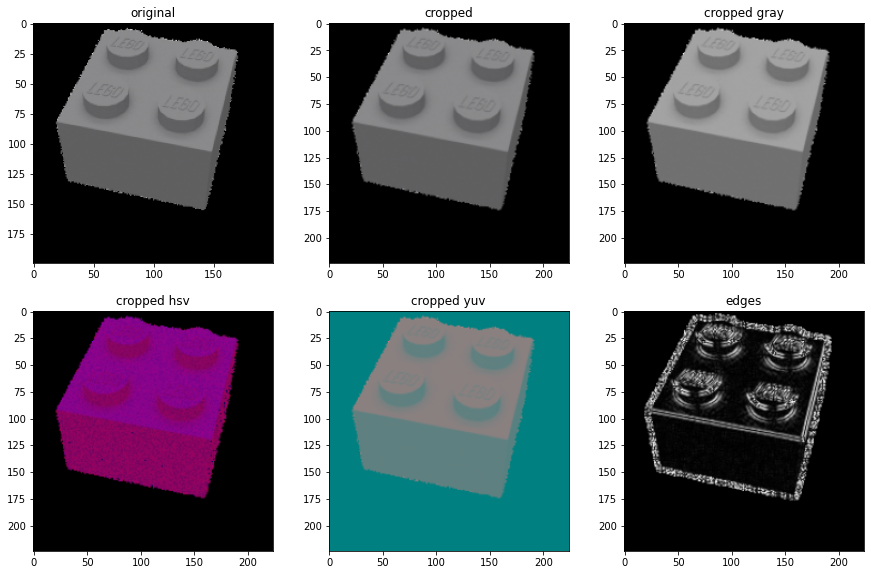

In [ ]:
original, cropped_rgb, cropped_gray, cropped_hsv, cropped_yuv, edges = load_center_crop_resize(f"{test_dir}Brick/Brick 2x2/0001.png")

plt.figure(figsize=(15, 15))
ax = plt.subplot(3, 3, 1)
plt.title('original')
plt.imshow(original)
ax = plt.subplot(3, 3, 2)
plt.title('cropped')
plt.imshow(cropped_rgb)
ax = plt.subplot(3, 3, 3)
plt.title('cropped gray')
plt.imshow(cropped_gray)
ax = plt.subplot(3, 3, 4)
plt.title('cropped hsv')
plt.imshow(cropped_hsv)
ax = plt.subplot(3, 3, 5)
plt.title('cropped yuv')
plt.imshow(cropped_yuv)
ax = plt.subplot(3, 3, 6)
plt.title('edges')
plt.imshow(edges)

**LOAD TRAINING DATA**

In [ ]:
def load_synthetic_images(start_dir, file_filter):
    dataset = pd.DataFrame()
    categories = sorted(os.listdir(train_dir))
    
    for category in categories:
        path = os.path.join(start_dir, category)
        label = categories.index(category)
        print(category)
        
        for img_path in os.listdir(path) and glob.glob(os.path.join(glob.escape(path), file_filter), recursive=True):
            
            img, img_rgb, img_gray, img_hsv, img_yuv, edges = load_center_crop_resize(img_path)
            img_path_split = os.path.normpath(img_path).split(os.sep)
            lego_type = img_path_split[-2]
            lego_family = img_path_split[-3]
            
            df = pd.DataFrame.from_records({
                'img': [img_rgb],
                #'img_gray': [img_gray],
                #'img_hsv': [img_hsv],
                'img_yuv': [img_yuv],
                #'edges': [edges],
                'img_path': [img_path],
                'LegoType': [lego_type],
                'LegoFamily': [lego_family],
            })
                
            dataset = pd.concat([dataset, df])
                
    return dataset            

In [ ]:
training_data = load_synthetic_images(train_dir, "**/*/*.png")

Brick
Lever
Plate


In [ ]:
training_data.dtypes

LegoFamily    object
LegoType      object
img           object
img_path      object
img_yuv       object
dtype: object

In [ ]:
display(training_data)

,LegoFamily,LegoType,img,img_path,img_yuv
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
...,...,...,...,...,...
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Plate/Plate 1X2 wit...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Plate/Plate 1X2 wit...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Plate/Plate 1X2 wit...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Plate/Plate 1X2 wit...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."


In [ ]:
print(f"Training data {training_data.shape}")

Training data (3617, 5)


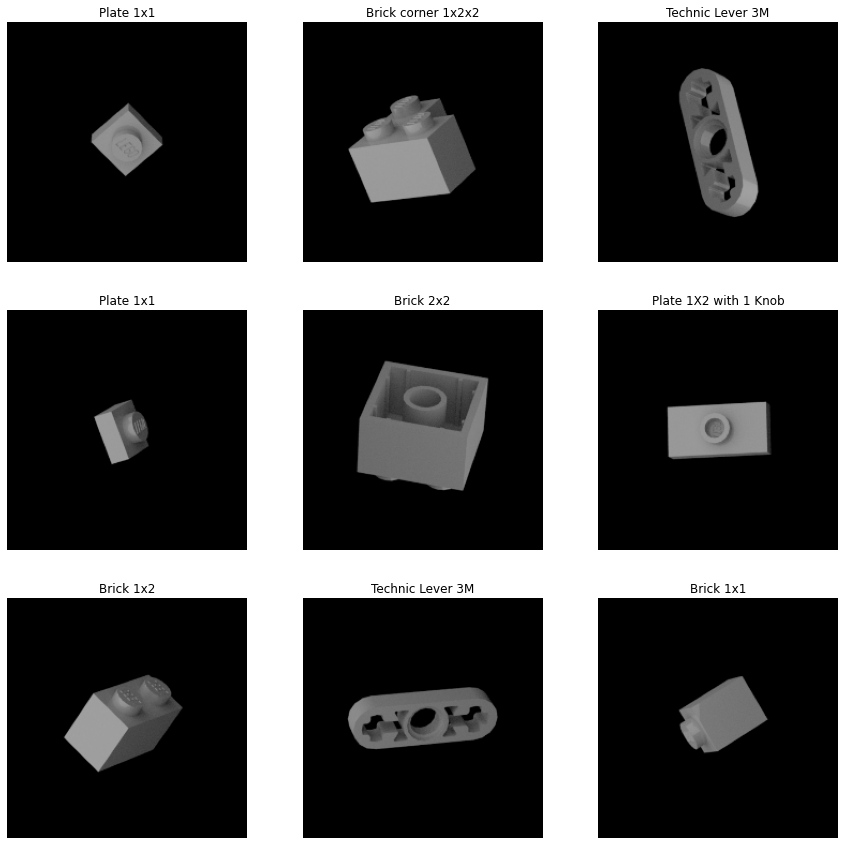

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  idx = random.randrange(0, len(training_data))
  row = training_data.iloc[idx]
  plt.title(row['LegoType'])
  plt.imshow(row['img'])
  plt.axis("off")

**LOAD TEST DATA**

In [ ]:
def load_test_images(start_dir, file_filter):
    dataset = pd.DataFrame()
    categories = sorted(os.listdir(test_dir))
    
    for category in categories:
        path = os.path.join(start_dir, category)
        label = categories.index(category)
        print(category)
        
        for img_path in os.listdir(path) and glob.glob(os.path.join(glob.escape(path), file_filter), recursive=True):
            
            img, img_rgb, img_gray, img_hsv, img_yuv, edges = load_center_crop_resize(img_path)
            img_path_split = os.path.normpath(img_path).split(os.sep)
            lego_type = img_path_split[-2]
            lego_family = img_path_split[-3]
            
            df = pd.DataFrame.from_records({
                'img': [img_rgb],
                #'img_gray': [img_gray],
                #'img_hsv': [img_hsv],
                'img_yuv': [img_yuv],
                #'edges': [edges],
                'img_path': [img_path],
                'LegoType': [lego_type],
                'LegoFamily': [lego_family],
            })
                
            dataset = pd.concat([dataset, df])
                
    return dataset             

In [ ]:
test_data = load_test_images(test_dir, "**/*/*.png")

Brick
Lever
Plate


In [ ]:

test_data.dtypes

LegoFamily    object
LegoType      object
img           object
img_path      object
img_yuv       object
dtype: object

In [ ]:
display(test_data)

,LegoFamily,LegoType,img,img_path,img_yuv
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0018...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0059...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0047...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0054...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0017...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
...,...,...,...,...,...
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Plate/Plate 1X2 with...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Plate/Plate 1X2 with...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Plate/Plate 1X2 with...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Plate,Plate 1X2 with 1 Knob,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Plate/Plate 1X2 with...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."


In [ ]:

print(f"Test data {test_data.shape}")

Test data (891, 5)


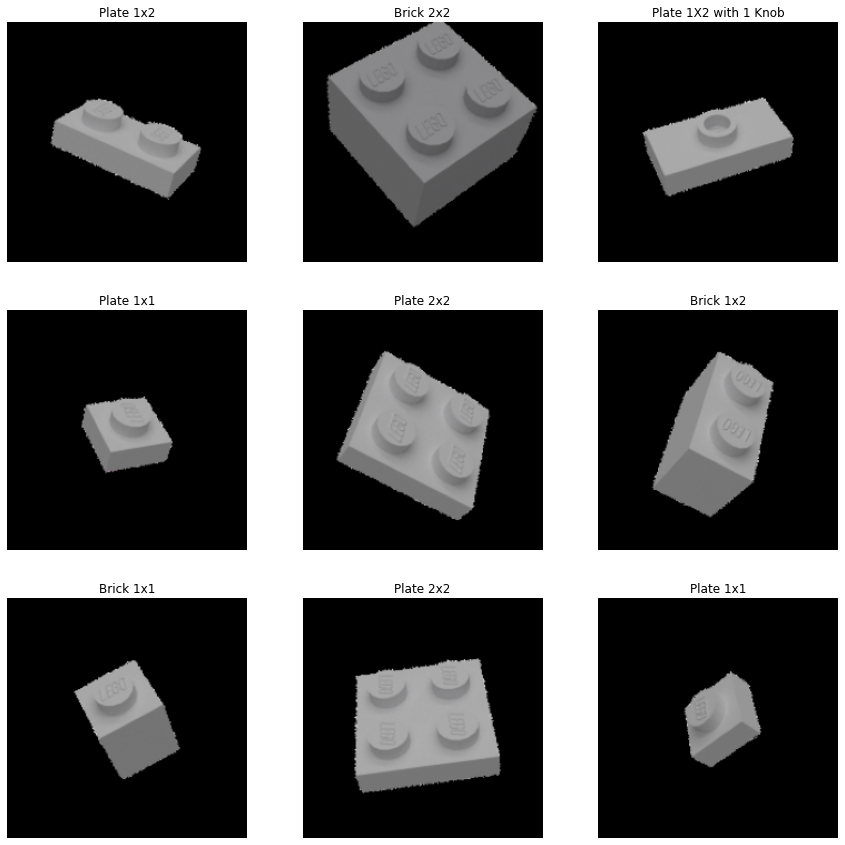

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  idx = random.randrange(0, len(test_data))
  row = test_data.iloc[idx]
  plt.title(row['LegoType'])
  plt.imshow(row['img'])
  plt.axis("off")

**SAVE THE PREPROCESSING DATA TO FILE**

In [ ]:
training_data.to_pickle("training_data_lego.pk1")

In [ ]:
test_data.to_pickle("test_data_lego.pk1")

**SYNTHETIC GENERATION OF MACHINE LEARNING TRAINING DATASET**

**IMPORT PYTHON LIBRARIES**

In [ ]:
import os
import cv2
import glob
import json
from IPython.display import HTML
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Dense, GlobalAveragePooling2D
from keras import optimizers
import pathlib



In [ ]:
import PIL
from PIL import Image

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import sklearn
from sklearn import model_selection
from sklearn.metrics import auc, roc_curve, classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, average_precision_score
from sklearn.metrics import recall_score

In [ ]:
print(tf.__version__)

2.8.2


**INITIALISE VARIABLES**

In [ ]:
img_width = 224
img_height = 224
img_size = (img_width, img_height)

Lego_dataset = local_zip
test_dir = '/tmp/Lego Dataset/test ds/'
train_dir = '/tmp/Lego Dataset/train ds/'

lego_Type = ['Brick 1x1',
               'Brick 1x2',
               'Brick 2x2',
               'Brick corner 1x2x2',
               'Plate 1X2 with 1 Knob',
               'Plate 1x1',
               'Plate 1x2',
               'Plate 2x2',
               'Technic Lever 3M',]
lego_family = ['Brick',
                'Plate',               
                'Lever',]              

n_classes = len(lego_family)

**HELPERS FUNCTION**

In [ ]:
def map_classes(c):
  return lego_family.index(c)

**LOADING TRAINING DATA**

In [ ]:
training_data_full = pd.read_pickle('training_data_lego.pk1')

In [ ]:
print(f"Training data: {training_data_full.shape}")

Training data: (3617, 5)


In [ ]:
training_data_full.head()

,LegoFamily,LegoType,img,img_path,img_yuv
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/train ds/Brick/Brick 1x1/300...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."


In [ ]:
# filter the data we want from the full training dataset
training_data = training_data_full.query("LegoFamily in @lego_family")
training_data.shape

(3617, 5)

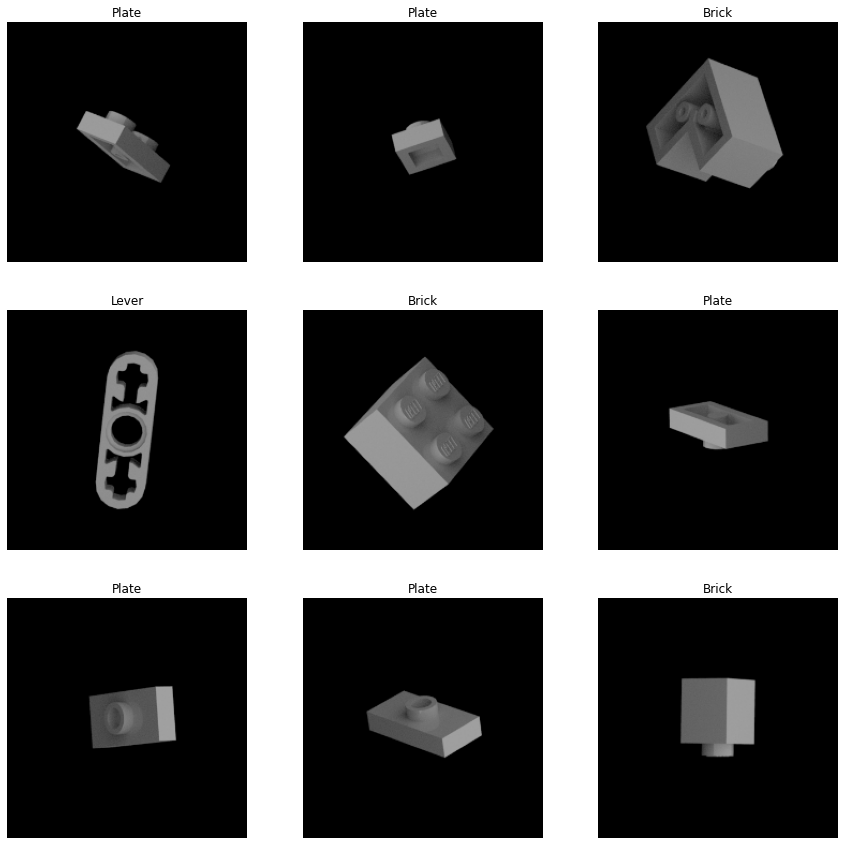

In [ ]:
# print 9 random images
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  idx = random.randrange(0, len(training_data))
  row = training_data.iloc[idx]
  plt.title(row['LegoFamily'])
  plt.imshow(row['img'])
  plt.axis("off")

**LOADING TESTING DATA**

In [ ]:
test_data_full = pd.read_pickle("test_data_lego.pk1")

In [ ]:
print(f"Test data: {test_data_full.shape}")

Test data: (891, 5)


In [ ]:
test_data_full.head()

,LegoFamily,LegoType,img,img_path,img_yuv
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0018...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0059...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0047...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0054...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."
0,Brick,Brick 1x1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",/tmp/Lego Dataset/test ds/Brick/Brick 1x1/0017...,"[[[0, 128, 128], [0, 128, 128], [0, 128, 128],..."


In [ ]:
# filter the data we want from the full dataset
test_data = test_data_full.query('LegoFamily in @lego_family')
test_data.shape

(891, 5)

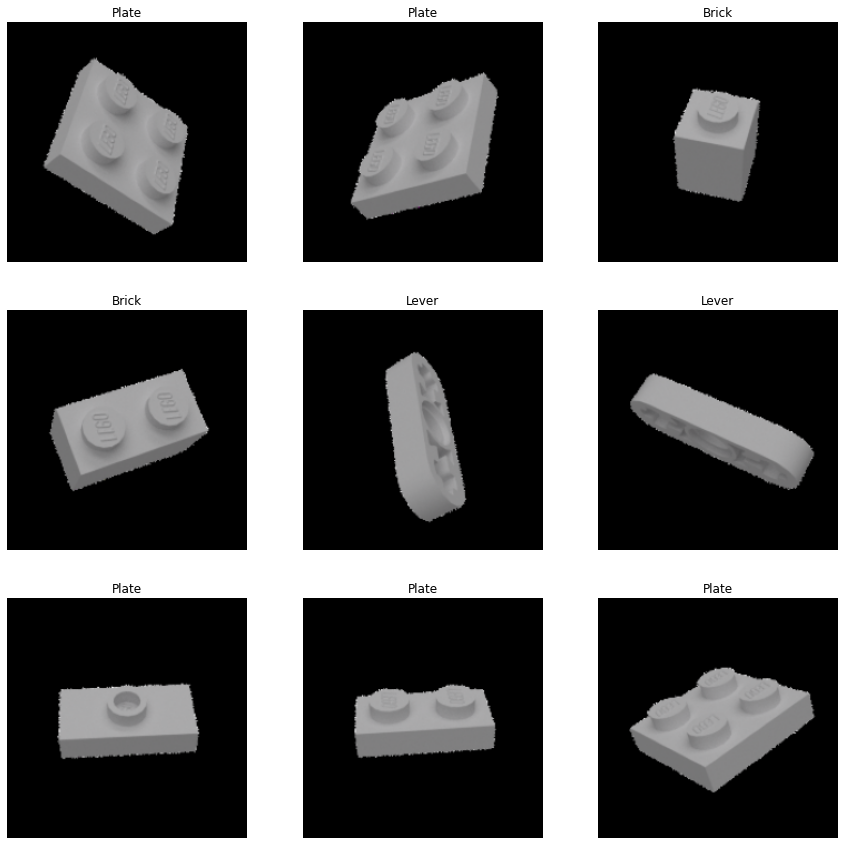

In [ ]:
# print 9 random images
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  idx = random.randrange(0, len(test_data))
  row = test_data.iloc[idx]
  plt.title(row['LegoFamily'])
  plt.imshow(row['img'])
  plt.axis("off")


**SPLIT DATA INTO TRAINING, VALIDATION AND TEST DATASET**

In [ ]:
Lego_Family = training_data['LegoFamily'].values
classification = np.asarray(list(map(map_classes, Lego_Family)))

In [ ]:
# convert training_data['img] from a 1D array of 3D array into a 4D array
imgs = np.stack(training_data['img'].values, axis = 0)

In [ ]:
train_ds, val_ds, train_class, val_class = sklearn.model_selection.train_test_split(imgs, classification, train_size = 0.8)

In [ ]:
print(f"Training data: {train_ds.shape} Training class: {train_class.shape}")
print(f"Validation data: {val_ds.shape} Validation class: {val_class.shape}")

Training data: (2893, 224, 224, 3) Training class: (2893,)
Validation data: (724, 224, 224, 3) Validation class: (724,)


**DEFINE A PRE TRAINED MODEL (MobileNet V2)**

In [ ]:
#from keras.applications.vgg16 import VGG16, preprocess_input
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
#rescale = tf.keras.layers.Rescaling(1./127.5, offset = -1)

In [ ]:
from keras.layers import Dense, Input, Dropout
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
def build_model():
  mobilenet = tf.keras.applications.MobileNetV2(
      weights = 'imagenet',
      include_top = False,
      input_shape = (224,224,3)
  )
  model = Sequential()
  model.add(mobilenet)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(n_classes, activation='softmax'))

  model.compile(
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      optimizer=Adam(lr=0.00002),
      metrics=['accuracy']
  )

  return model

In [ ]:
model = build_model()
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable params: 34,112
____________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 20
history = model.fit(train_ds, train_class, epochs = epochs, validation_data =(val_ds, val_class))

Epoch 1/20
91/91 [==============================] - 567s 6s/step - loss: 0.5478 - accuracy: 0.7788 - val_loss: 0.8998 - val_accuracy: 0.5387
Epoch 2/20
91/91 [==============================] - 565s 6s/step - loss: 0.1517 - accuracy: 0.9558 - val_loss: 0.9105 - val_accuracy: 0.5525
Epoch 3/20
91/91 [==============================] - 559s 6s/step - loss: 0.0848 - accuracy: 0.9761 - val_loss: 0.8504 - val_accuracy: 0.5939
Epoch 4/20
91/91 [==============================] - 563s 6s/step - loss: 0.0560 - accuracy: 0.9869 - val_loss: 0.7481 - val_accuracy: 0.6506
Epoch 5/20
91/91 [==============================] - 564s 6s/step - loss: 0.0422 - accuracy: 0.9886 - val_loss: 0.5987 - val_accuracy: 0.7459
Epoch 6/20
91/91 [==============================] - 561s 6s/step - loss: 0.0291 - accuracy: 0.9927 - val_loss: 0.4728 - val_accuracy: 0.8039
Epoch 7/20
91/91 [==============================] - 558s 6s/step - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.4563 - val_accuracy: 0.8135
Epoch 8/20
91

**SAVE THE MODEL**

In [ ]:
model.save("lego.h5")

In [ ]:
with open('lego.json', 'w') as f:
  json.dump(lego_family, f)


**EVALUATE THE MODEL**

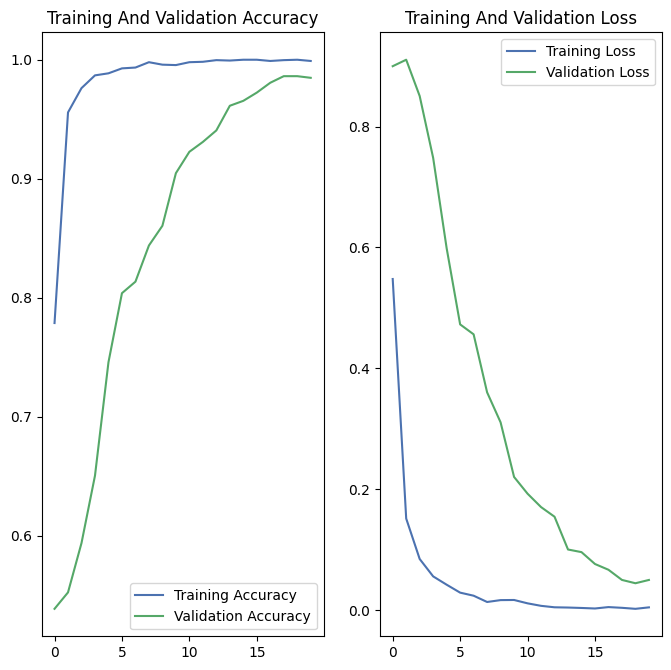

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training And Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title("Training And Validation Loss")
plt.show()

In [ ]:
test_legofamilylist = test_data['LegoFamily'].values
test_classification = np.asarray(list(map(map_classes, test_legofamilylist)))

# convert test_data['img] from a 1D array of 3D array into a 4D array
test_ds = np.stack(test_data['img'].values)
results = model.evaluate(test_ds, test_classification, batch_size=128)

7/7 [==============================] - 28s 4s/step - loss: 0.7088 - accuracy: 0.7475


In [ ]:
print("Test loss, Test acc:", results)

Test loss, Test acc: [0.7088261246681213, 0.747474730014801]


In [ ]:
preds = model.predict(test_ds)

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
preds = probability_model.predict(test_ds)

In [ ]:
preds[0]

array([0.34488544, 0.4185649 , 0.23654969], dtype=float32)

In [ ]:
print(preds.shape)

(891, 3)


In [ ]:
y_pred = np.argmax(preds, axis = 1)
print(y_pred.shape)

(891,)


In [ ]:
Lego_Family[y_pred[0]]

'Brick'

In [ ]:
test_data['predictionClass'] = y_pred

In [ ]:
def map_class2product(c):
  return Lego_Family[c]

test_data['PredictedLegoFamily'] = list(map(map_class2product, y_pred))

In [ ]:
test_passed = test_data.query('LegoFamily == PredictedLegoFamily')

In [ ]:
test_failed = test_data.query('LegoFamily != PredictedLegoFamily')

In [ ]:
np.argmax(preds[0])

1

In [ ]:
Lego_Family[np.argmax(preds[0])]

'Brick'

In [ ]:
print('\n Confusion Matrix')
cm = confusion_matrix(test_classification, y_pred)
print(cm)


print('\n Classification Report')
target_names = len(lego_family)
print(classification_report(test_classification, y_pred, labels=[0,1,2]))

f1Score = f1_score(test_classification,y_pred,average = "macro")
precision = precision_score(test_classification,y_pred,average = "macro")
recall = recall_score(test_classification,y_pred,average = "macro")

print("F1 Score: ",f1Score,"Precision: ",precision, "Recall: ",recall)


 Confusion Matrix
[[192 201   3]
 [  2 386   8]
 [  0  11  88]]

 Classification Report
              precision    recall  f1-score   support

           0       0.99      0.48      0.65       396
           1       0.65      0.97      0.78       396
           2       0.89      0.89      0.89        99

    accuracy                           0.75       891
   macro avg       0.84      0.78      0.77       891
weighted avg       0.83      0.75      0.73       891

F1 Score:  0.7721321020915196 Precision:  0.8413548534570499 Recall:  0.7828282828282829


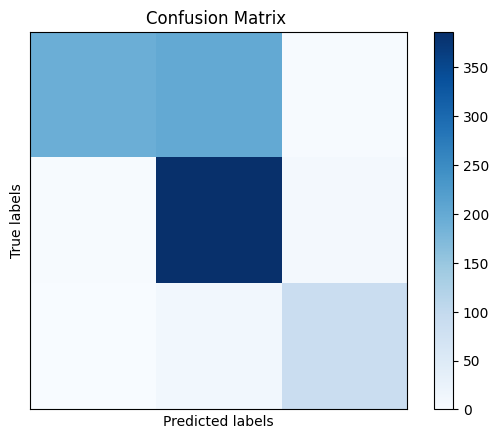

In [ ]:
# Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion Matrix ')
plt.colorbar()
plt.show()

In [ ]:
num_Lego_Family = len(lego_family)

LegoCorrect = 0
LegoIncorrect = 0

legocorrect = np.zeros(num_Lego_Family)
legoincorrect = np.zeros(num_Lego_Family)
results = []

for i in range(0, len(test_classification)):
  lego = lego_family[test_classification[i]]


  if (test_classification[i] == y_pred[i]):
    result = "Pass"
    LegoCorrect = LegoCorrect + 1
    legocorrect[test_classification[i]] = legocorrect[test_classification[i]] + 1

  else:
    result = "Fail"
    LegoIncorrect = LegoIncorrect + 1
    legoincorrect[test_classification[i]] = legoincorrect[test_classification[i]] + 1

  print(f"{i}\t{lego}\tActual:{test_classification[i]}\tPredicted: {y_pred[i]}\tResult: {result}\tProb {preds[i]}")
  results.append(result) 

test_data['results'] = results

print("\n")
for i in range(0, num_Lego_Family):
  accuracy = (legocorrect[i]/(legocorrect[i] + legoincorrect[i]))
  print(f"{lego_family[i]}:\tCorrect {legocorrect[i]}\tIncorrect {legoincorrect[i]}\tAccuracy {accuracy*100: .2f}%")

print("\n")
print("Total correct predictions: ",legocorrect)
print("Total incorrect predictions: ",legoincorrect)

0	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.34488544 0.4185649  0.23654969]
1	Brick	Actual:0	Predicted: 0	Result: Pass	Prob [0.44856498 0.311431   0.24000402]
2	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.26412272 0.50865304 0.22722422]
3	Brick	Actual:0	Predicted: 0	Result: Pass	Prob [0.47607625 0.27304485 0.2508789 ]
4	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.22190782 0.5497498  0.22834234]
5	Brick	Actual:0	Predicted: 0	Result: Pass	Prob [0.5359581  0.23915902 0.22488293]
6	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.22229025 0.56168836 0.21602133]
7	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.3502638  0.39547306 0.25426307]
8	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.3418773  0.35944086 0.2986818 ]
9	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.2227447  0.5615327  0.21572265]
10	Brick	Actual:0	Predicted: 1	Result: Fail	Prob [0.28888258 0.46432197 0.2467954 ]
11	Brick	Actual:0	Predicted: 0	Result: Pass	Prob [0.40035868 0.3365847  0.2630566 ]
12

**GRAPHS**

**GRAPHS FOR RESULT OF THE PREDICTION**

In [ ]:
import matplotlib.pyplot as plt
# importing the library for the graph

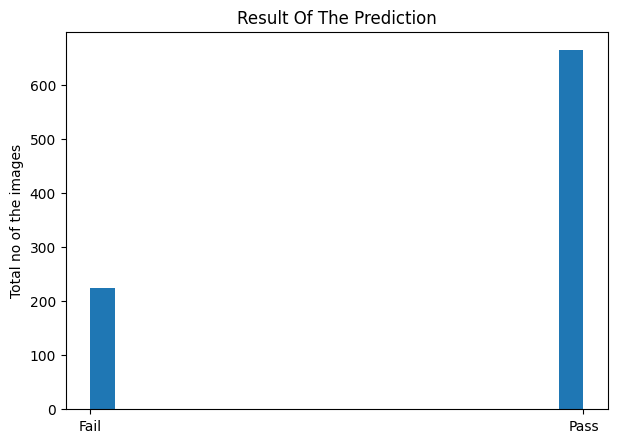

In [ ]:
x = test_data['results']

%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

#plot histogram on x

plt.hist(x, bins = 20)
plt.gca().set(title = 'Result Of The Prediction', ylabel = 'Total no of the images');

**PREDICTION OF TEST IMAGES**

This image most likely belongs to Brick with a 43.52 percent confidence.


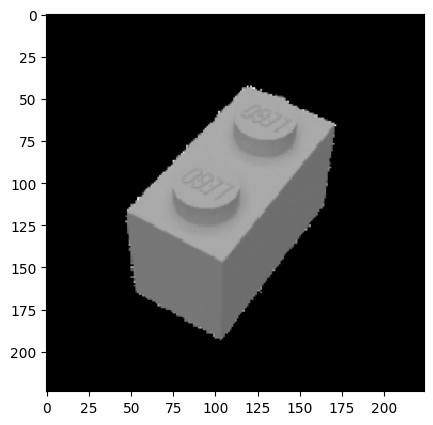

In [ ]:
img = keras.preprocessing.image.load_img(f"{test_dir}Brick/Brick 1x2/0005.png", target_size = img_size)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

#Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(lego_family[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Plate with a 53.28 percent confidence.


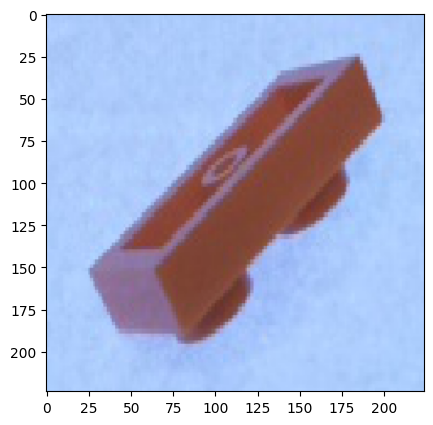

In [ ]:
img = keras.preprocessing.image.load_img("/1_Plate_1x2_180708201418.jpg", target_size = img_size)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

#Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(lego_family[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Brick with a 53.28 percent confidence.


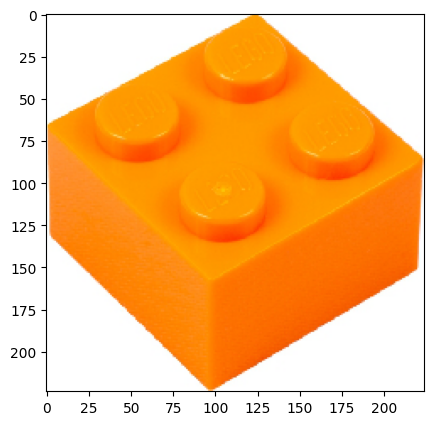

In [ ]:
img = keras.preprocessing.image.load_img("/2x2-brick-single.jpg", target_size = img_size)
plt.imshow(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

#Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(lego_family[np.argmax(score)], 100 * np.max(score))
)